The company wants to understand the relationships between available metrics (page exit rate, revenue, size, speed, page viewing time) and between the
total hits for each page.

1. First read all the data in and compile a summary data frame:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
exit_rate = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)
revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)


summary_data = pd.DataFrame(index=data.columns)
summary_data['View Time'] = viewing_time.values
summary_data['Hits'] = data.sum().values
summary_data['Revenue'] = revenue.values
summary_data['Speed'] = speed.values
summary_data['Size'] = size.values
summary_data['Exit Rate'] = exit_rate.values
print(summary_data.describe())

        View Time           Hits      Revenue       Speed        Size  \
count  167.000000     167.000000   167.000000  167.000000  167.000000   
mean    75.773000    6834.107784    45.083074    7.403677   73.381717   
std     45.550918   46443.203819   321.324721    3.244402   26.344074   
min      7.613396     271.000000     1.517484    2.364779   31.567770   
25%     41.656096     578.000000     3.635506    4.786757   48.157745   
50%     67.013740     896.000000     5.612278    6.877288   73.385441   
75%    107.116349    1193.500000     7.649743    9.693290   94.480074   
max    204.860299  467123.000000  3666.786051   16.545720  119.837762   

        Exit Rate  
count  167.000000  
mean    37.802219  
std     21.486012  
min      0.325126  
25%     19.814239  
50%     39.867880  
75%     56.066053  
max     74.555378  


2. Create an initial visualisation showing bar chart subplots for all 6 metrics

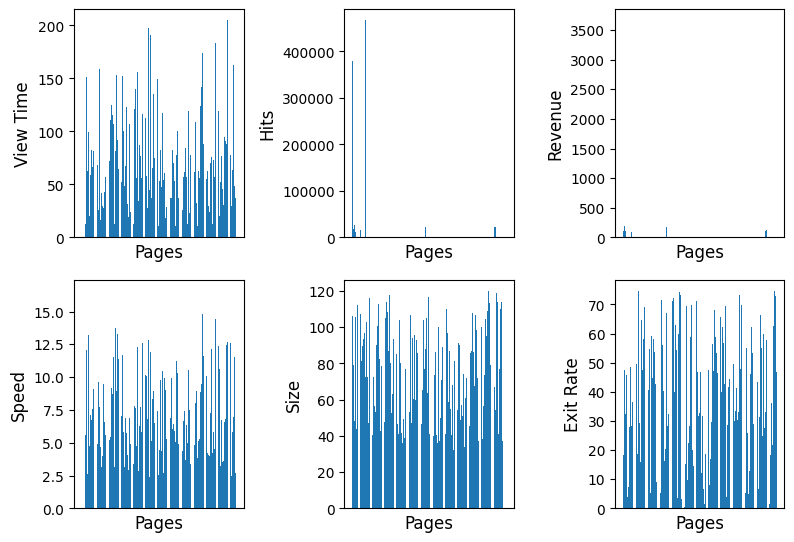

In [3]:
plt.figure(figsize=(8, 8))
counter = 1
x_pos = np.arange(len(summary_data.index))
for attribute in summary_data:
  sub = plt.subplot(3, 3, counter)
  sub.bar(x_pos, summary_data[attribute], align='center')
  sub.set_xticks([])
  sub.set_xlabel('Pages', fontsize=12)
  sub.set_ylabel(attribute, fontsize=12)
  counter += 1
plt.tight_layout()
plt.show()


3. Create a visualisation showing radar subplots for high volume pages, noting that the company
regards viewing time as a neutral indicator – it is good that users spend a lot of time on each page but it may
mean that they can't find what they are looking for.

     View Time      Hits   Revenue     Speed      Size  Exit Rate
001   0.856381  0.812809  0.537839  0.459396  0.885814   0.332090
002   0.368419  0.037251  0.027773  0.427855  0.662165   0.247583
003   0.048950  0.058334  0.053493  0.284958  0.402281   0.637354
004   0.575038  0.024978  0.027996  0.845852  0.882106   0.433969
005   0.061126  0.001141  0.000835  0.339838  0.363771   0.614691


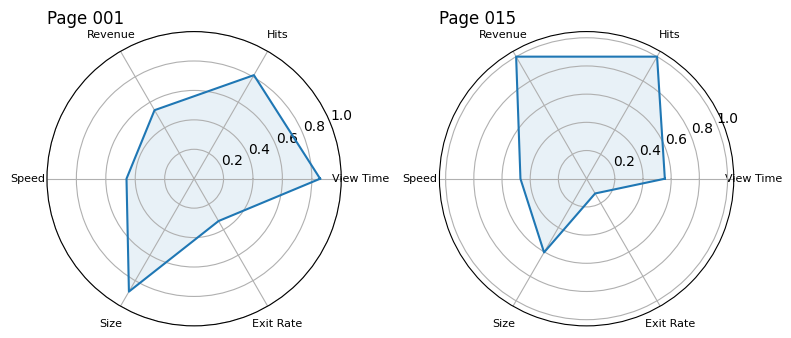

In [4]:
# Let's first normalise the data
normalised_data = summary_data/summary_data.max()
print(normalised_data.head())

selected = ['001', '015']

angles = [n / float(len(summary_data.columns)) * 2 * np.pi for n in range(len(summary_data.columns) + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
  values = normalised_data.loc[[name]].values.flatten().tolist()
  values += values[:1]
  sub = plt.subplot(2, 2, counter, polar=True)
  sub.plot(angles, values)
  sub.fill(angles, values, alpha=0.1)
  sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
  sub.set_xticks(angles[0:-1])
  sub.set_xticklabels(summary_data.columns, fontsize=8)
  sub.set_title('Page ' + name, fontsize=12, loc='left')
  counter += 1
plt.tight_layout()
plt.show()

The speed and the view time are neutral. The company wants to increase the revenue and the total hits for each page, so they are on top. The company wants to decrease the size of the content and the exit rate, so they are in the bottom.

4. Now create a visualisation showing radar subplots for medium volume pages after normalizing the data by the maximum value from medium-volume pages only since the
visualisation is restricted to these pages.

     View Time       Hits    Revenue     Speed      Size  Exit Rate
001   1.489260  13.933796  10.054427  0.543117  0.987656   0.370036
002   0.640687   0.638592   0.519188  0.505827  0.738295   0.275873
003   0.085124   1.000000   1.000000  0.336889  0.448532   0.710181
004   1.000000   0.428199   0.523351  1.000000  0.983522   0.483556
005   0.106300   0.019560   0.015601  0.401770  0.405594   0.684928


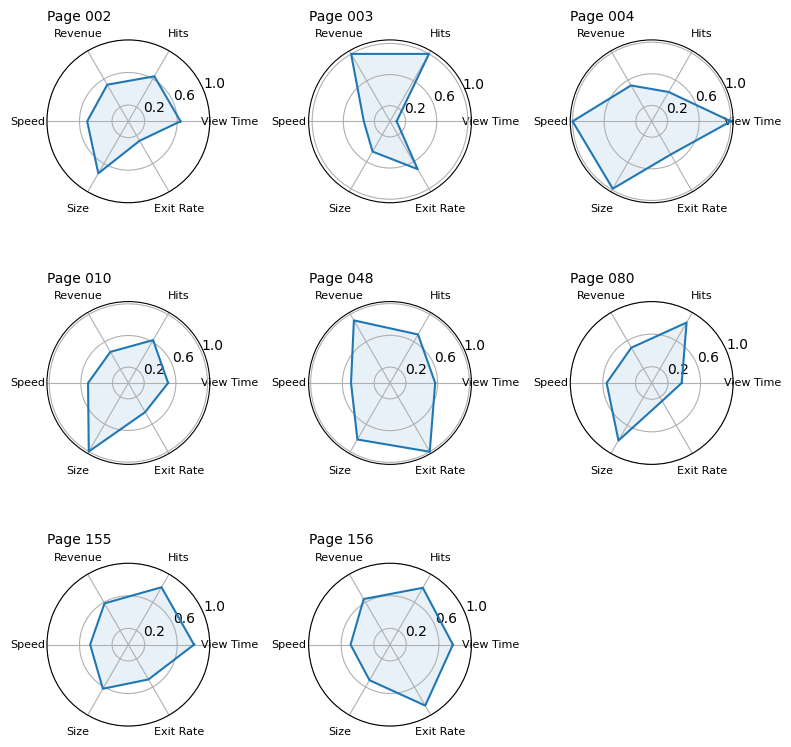

In [5]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']

# Let's first normalise the data
normalised_data = summary_data / summary_data.loc[selected].max()
print(normalised_data.head())


angles = [n / float(len(summary_data.columns)) * 2 * np.pi for n in range(len(summary_data.columns) + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
  values = normalised_data.loc[[name]].values.flatten().tolist()
  values += values[:1]
  sub = plt.subplot(3, 3, counter, polar=True)
  sub.plot(angles, values)
  sub.fill(angles, values, alpha=0.1)
  sub.set_yticks([0.2, 0.6, 1.0])
  sub.set_xticks(angles[0:-1])
  sub.set_xticklabels(summary_data.columns, fontsize=8)
  sub.set_title('Page ' + name, fontsize=10, loc='left')
  counter += 1
plt.tight_layout()
plt.show()

Page 003 seems to be the most valuable in terms of hits and revenue.

5. Next, let's create a correlogram / pair-plot of all 6 metrics.

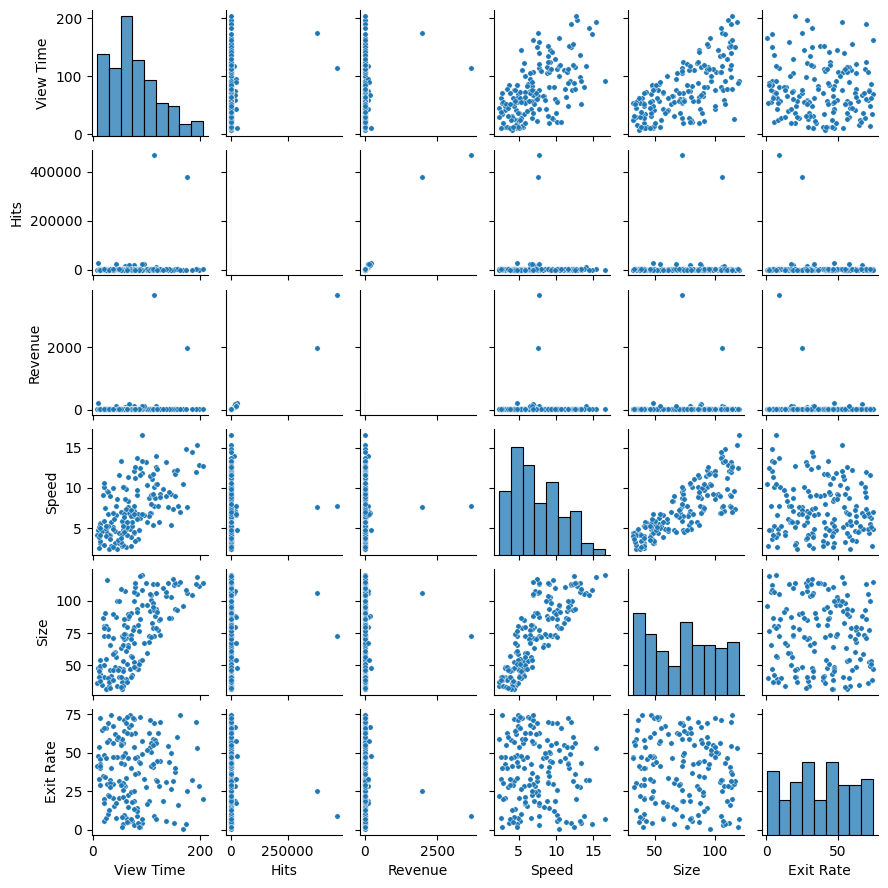

In [6]:
import seaborn as sns

sns.pairplot(summary_data, height=1.5, plot_kws={'s': 15})
plt.show()

6. As the correlogram is a bit unclear for some subplots because again the total hits for the high
volume pages are so much larger than the other pages. To explore the correlations further, let's create a
heatmap of correlations between the 6 metrics.

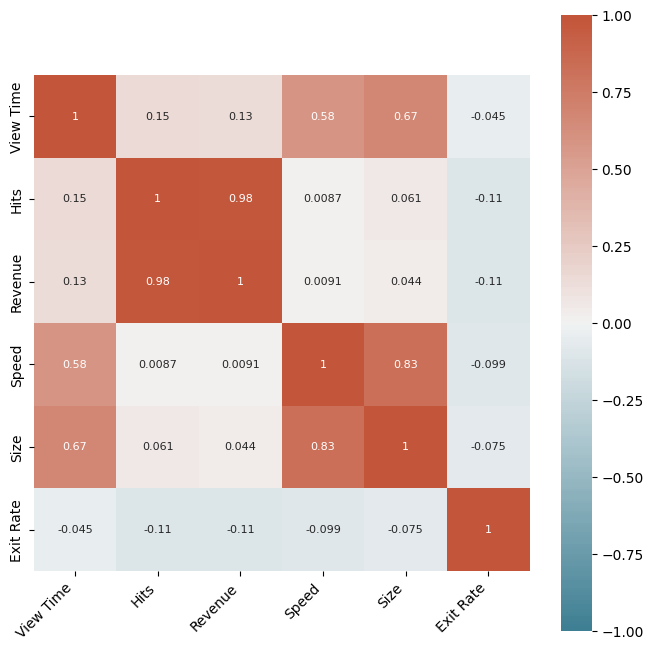

In [7]:
plt.figure(figsize=(8, 8))
corr = summary_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Strong positive correlations: Revenue vs Hits, Size vs Speed, and Size vs Viewing Time.

7. Finally the company is interested in how the viewing time varies across medium volume pages as compared
with page hits and revenue. Let's generate a bubble plot of hits against revenue with viewing time determining
the bubble sizes.


001    379682
002     17401
003     27249
004     11668
005       533
Name: Hits, dtype: int64


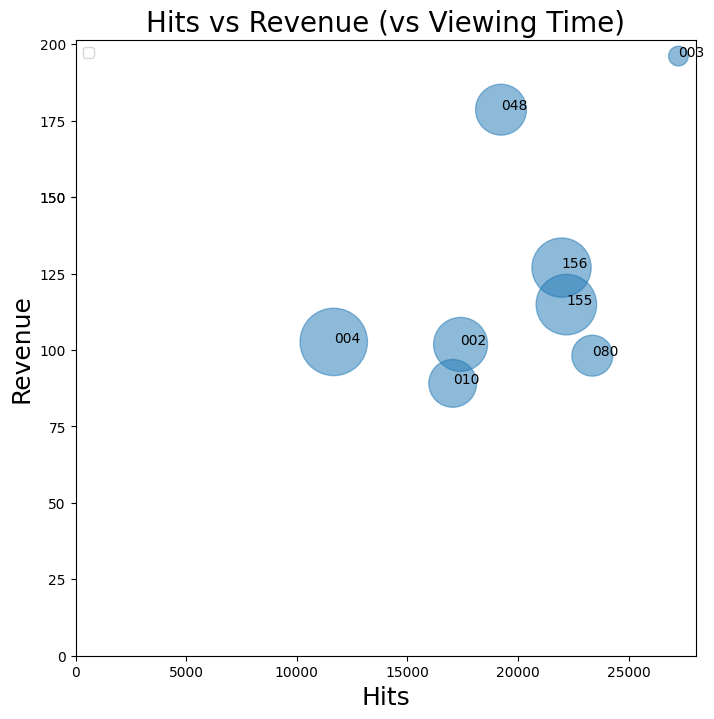

In [8]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']
print(summary_data['Hits'].head())

summary_data = summary_data.loc[selected]

summary_data['BubbleSize'] = summary_data['View Time'] * 20

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Hits'], summary_data['Revenue'], s=summary_data['BubbleSize'], alpha=0.5)
plt.xticks([0, 5000, 10000, 15000, 20000, 25000])
plt.yticks([0, 25, 50, 75, 100, 150, 125, 150, 175, 200])
plt.title('Hits vs Revenue (vs Viewing Time)', fontsize=20)
plt.xlabel('Hits', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
for i, name in enumerate(summary_data.index):
  plt.annotate(name, (summary_data['Hits'][i], summary_data['Revenue'][i]))
plt.legend(loc=2)
plt.show()